In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine=pd.read_csv("winequality-red.csv")
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
wine.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


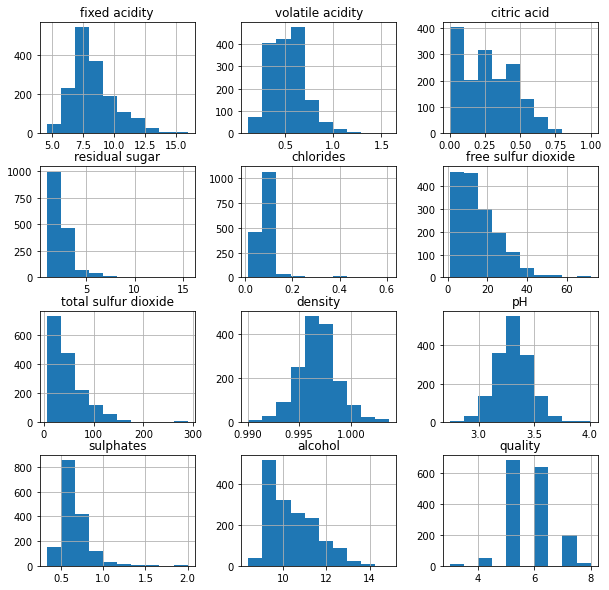

In [8]:
wine.hist(bins=10,figsize=(10,10))
plt.show()

Text(0, 0.5, 'alcohol')

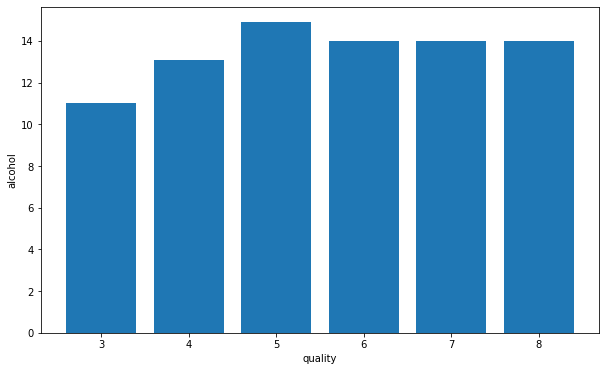

In [9]:
plt.figure(figsize=[10,6])
plt.bar(wine['quality'],wine['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')

<AxesSubplot:>

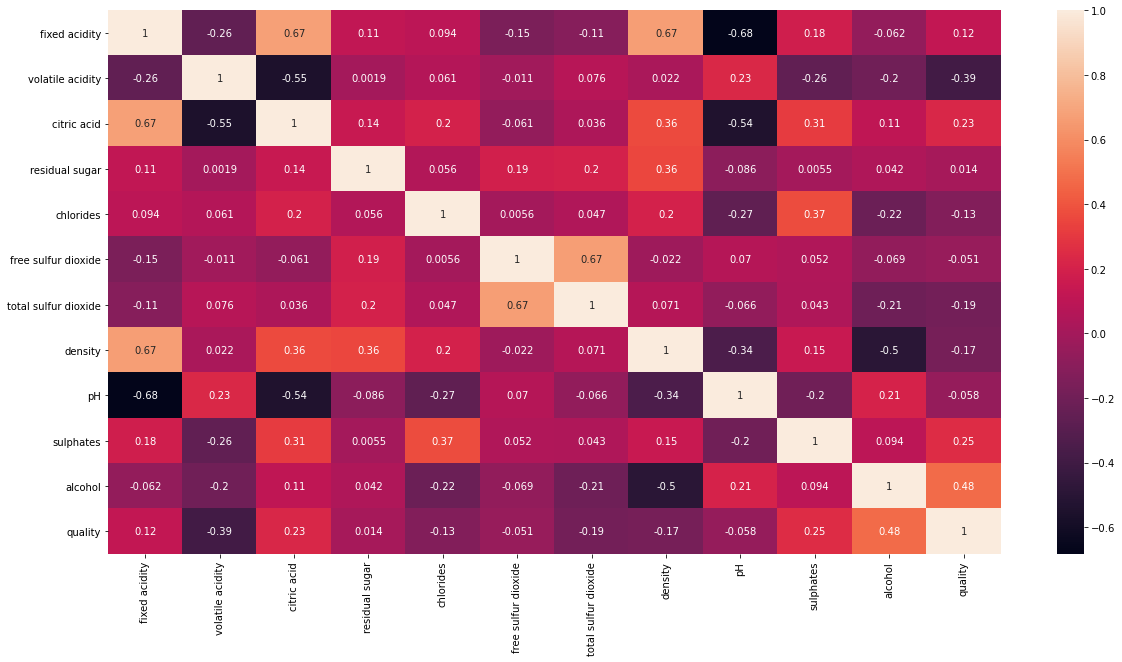

In [10]:
plt.figure(figsize=[20,10])
sns.heatmap(wine.corr(),annot=True)

In [11]:
from sklearn.model_selection import train_test_split,cross_val_score

In [12]:
quality=wine['quality']
features=wine.drop(['quality'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(features,quality,test_size=0.2,random_state=10)
print('Train: ',len(x_train)/len(features))
print('Test: ',x_test.shape[0]/features.shape[0])

Train:  0.7998749218261413
Test:  0.20012507817385866


In [13]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()
norm_fit=norm.fit(x_train)
x_train_new=norm_fit.transform(x_train)
x_test_new=norm_fit.transform(x_test)
print(x_train_new)
print(x_test_new)

[[0.12389381 0.26712329 0.         ... 0.62992126 0.35928144 0.35384615]
 [0.3539823  0.20547945 0.39       ... 0.48031496 0.21556886 0.50769231]
 [0.23893805 0.36986301 0.         ... 0.68503937 0.37724551 0.23076923]
 ...
 [0.21238938 0.17808219 0.49       ... 0.51181102 0.26347305 0.46153846]
 [0.47787611 0.15753425 0.47       ... 0.38582677 0.11377246 0.55384615]
 [0.21238938 0.32876712 0.3        ... 0.44094488 0.50299401 0.27692308]]
[[0.24778761 0.23972603 0.46       ... 0.45669291 0.17964072 0.32307692]
 [0.24778761 0.42465753 0.07       ... 0.2992126  0.08982036 0.24615385]
 [0.85840708 0.13013699 0.74       ... 0.09448819 0.2754491  0.        ]
 ...
 [0.31858407 0.10958904 0.4        ... 0.46456693 0.22155689 0.67692308]
 [0.32743363 0.45205479 0.1        ... 0.58267717 0.11976048 0.24615385]
 [0.2300885  0.3630137  0.02       ... 0.73228346 0.28143713 0.2       ]]


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
rf=RandomForestClassifier()
rf_fit=rf.fit(x_train_new,y_train)
score_rf=rf.score(x_train_new,y_train)
print('score of model is : ',score_rf)

score of model is :  1.0
